In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

C:\Users\DhvanibenJasoliya\AppData\Local\Temp\ipykernel_30968\3368425042.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2025-01-01', periods=num_hours, freq='H')


Data simulation complete! Saved to 'pump_iot_data.csv'.


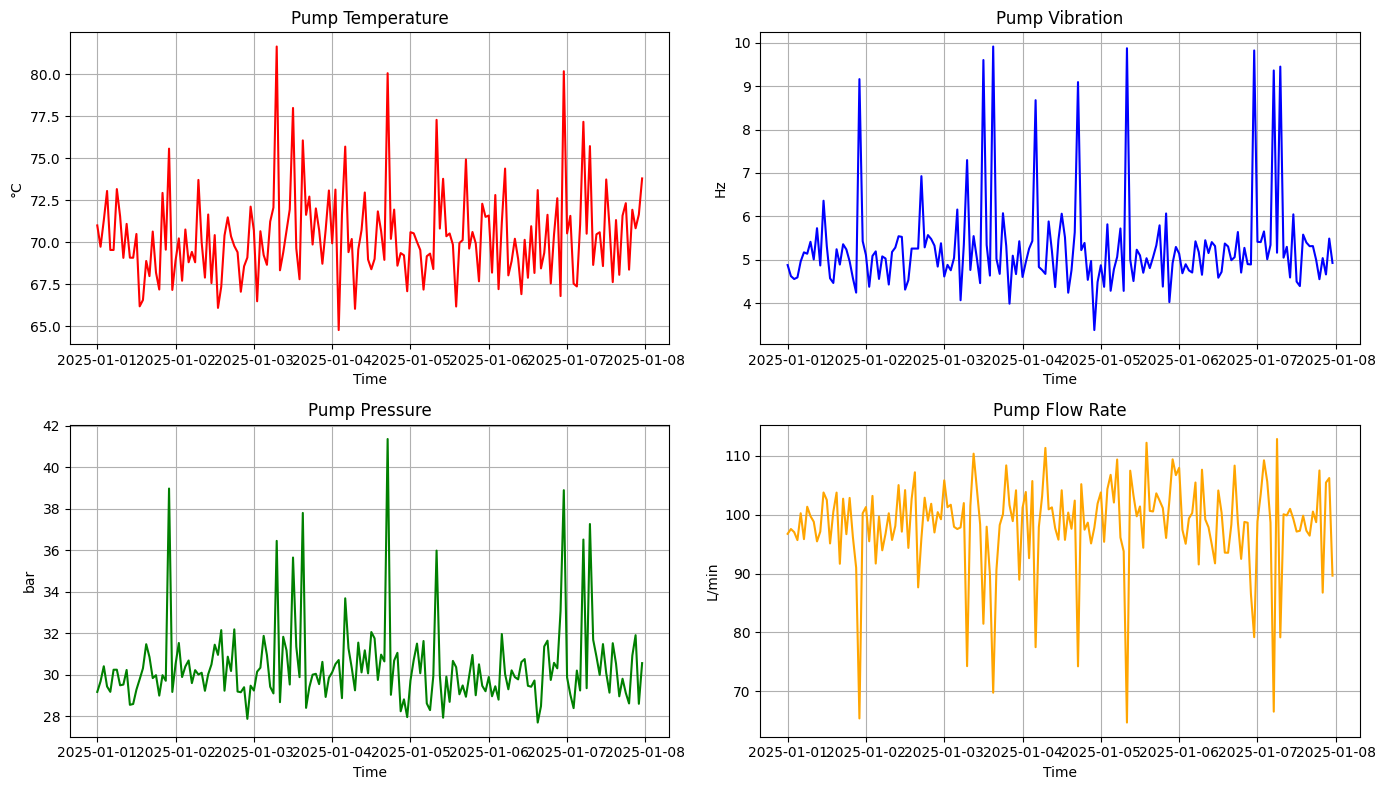

In [ ]:
# Simulate IoT Sensor Data for a Pump

# -----------------------------
# Simulation Parameters
# -----------------------------
num_hours = 24 * 7  # 1 week of data, hourly
timestamps = pd.date_range(start='2025-01-01', periods=num_hours, freq='H')

# Normal operating ranges
temp_mean, temp_std = 70, 2          # Temperature in °C
vibration_mean, vibration_std = 5, 0.5  # Vibration in Hz
pressure_mean, pressure_std = 30, 1   # Pressure in bar
flow_mean, flow_std = 100, 5          # Flow rate in L/min

# -----------------------------
# Generate Sensor Data
# -----------------------------
np.random.seed(42)  # reproducibility

temperature = np.random.normal(temp_mean, temp_std, num_hours)
vibration = np.random.normal(vibration_mean, vibration_std, num_hours)
pressure = np.random.normal(pressure_mean, pressure_std, num_hours)
flow_rate = np.random.normal(flow_mean, flow_std, num_hours)

# -----------------------------
# Introduce Anomalies (Faults)
# -----------------------------
num_anomalies = 10
anomaly_indices = np.random.choice(num_hours, num_anomalies, replace=False)

temperature[anomaly_indices] += np.random.uniform(5, 10, num_anomalies)
vibration[anomaly_indices] += np.random.uniform(3, 5, num_anomalies)
pressure[anomaly_indices] += np.random.uniform(5, 10, num_anomalies)
flow_rate[anomaly_indices] -= np.random.uniform(20, 30, num_anomalies)

# -----------------------------
# Create DataFrame
# -----------------------------
data = pd.DataFrame({
    'timestamp': timestamps,
    'temperature': temperature,
    'vibration': vibration,
    'pressure': pressure,
    'flow_rate': flow_rate
})

# Save to CSV
data.to_csv('pump_iot_data.csv', index=False)
print("Data simulation complete! Saved to 'pump_iot_data.csv'.")

# -----------------------------
# Visualize Data
# -----------------------------
plt.figure(figsize=(14, 8))
plt.subplot(2,2,1)
plt.plot(data['timestamp'], data['temperature'], label='Temperature (°C)', color='red')
plt.xlabel('Time'); plt.ylabel('°C'); plt.title('Pump Temperature'); plt.grid(True)

plt.subplot(2,2,2)
plt.plot(data['timestamp'], data['vibration'], label='Vibration (Hz)', color='blue')
plt.xlabel('Time'); plt.ylabel('Hz'); plt.title('Pump Vibration'); plt.grid(True)

plt.subplot(2,2,3)
plt.plot(data['timestamp'], data['pressure'], label='Pressure (bar)', color='green')
plt.xlabel('Time'); plt.ylabel('bar'); plt.title('Pump Pressure'); plt.grid(True)

plt.subplot(2,2,4)
plt.plot(data['timestamp'], data['flow_rate'], label='Flow Rate (L/min)', color='orange')
plt.xlabel('Time'); plt.ylabel('L/min'); plt.title('Pump Flow Rate'); plt.grid(True)

plt.tight_layout()
plt.show()


#  Digital Twin Simulation of Industrial Pump

**Objective:**  
Simulate pump behavior using a simple physics-based digital twin model.  
We will predict temperature, vibration, pressure, and flow rate based on current readings, and compare predictions to the simulated IoT data.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load IoT sensor data from Step 1
data = pd.read_csv('pump_iot_data.csv', parse_dates=['timestamp'])
data.head()


,timestamp,temperature,vibration,pressure,flow_rate
0,2025-01-01 00:00:00,70.993428,4.877306,29.174503,96.746787
1,2025-01-01 01:00:00,69.723471,4.623132,29.678614,97.564373
2,2025-01-01 02:00:00,71.295377,4.555243,30.412931,97.038030
3,2025-01-01 03:00:00,73.046060,4.592095,29.436275,95.680046
4,2025-01-01 04:00:00,69.531693,4.961449,29.177780,100.242608


## Define Digital Twin Model

We'll define a simple model with basic physics rules:

- Temperature increases slightly with higher vibration and pressure.
- Vibration increases if temperature or flow rate deviate from normal.
- Pressure depends on flow rate and vibration.
- Flow rate decreases if vibration or pressure are too high.

This is a simplified digital twin for demonstration purposes.


In [3]:
# Define normal operating points
normal_temp = 70
normal_vibration = 5
normal_pressure = 30
normal_flow = 100

# Digital Twin prediction function
def digital_twin_predict(temp, vibration, pressure, flow):
    # Temperature prediction
    temp_pred = temp + 0.05*(vibration - normal_vibration) + 0.03*(pressure - normal_pressure)
    
    # Vibration prediction
    vibration_pred = vibration + 0.02*(temp - normal_temp) + 0.01*(flow - normal_flow)
    
    # Pressure prediction
    pressure_pred = pressure + 0.04*(flow - normal_flow) + 0.02*(vibration - normal_vibration)
    
    # Flow rate prediction
    flow_pred = flow - 0.05*(pressure - normal_pressure) - 0.03*(vibration - normal_vibration)
    
    return temp_pred, vibration_pred, pressure_pred, flow_pred


##  Apply Digital Twin to Dataset

We'll run our digital twin model on the IoT dataset and store predicted values.


In [4]:
# Apply digital twin predictions
predictions = data.apply(lambda row: digital_twin_predict(
    row['temperature'], row['vibration'], row['pressure'], row['flow_rate']
), axis=1)

# Split predictions into separate columns
data[['temp_pred', 'vib_pred', 'press_pred', 'flow_pred']] = pd.DataFrame(predictions.tolist(), index=data.index)
data.head()


,timestamp,temperature,vibration,pressure,flow_rate,temp_pred,vib_pred,press_pred,flow_pred
0,2025-01-01 00:00:00,70.993428,4.877306,29.174503,96.746787,70.962529,4.864642,29.041920,96.791743
1,2025-01-01 01:00:00,69.723471,4.623132,29.678614,97.564373,69.694986,4.593245,29.573652,97.591748
2,2025-01-01 02:00:00,71.295377,4.555243,30.412931,97.038030,71.285527,4.551531,30.285558,97.030727
3,2025-01-01 03:00:00,73.046060,4.592095,29.436275,95.680046,73.008753,4.609817,29.255319,95.720470
4,2025-01-01 04:00:00,69.531693,4.961449,29.177780,100.242608,69.505099,4.954509,29.186713,100.284876


### Visualize Predictions vs Actual Data

We'll compare the digital twin predictions with actual sensor readings to see how well the model captures pump behavior.

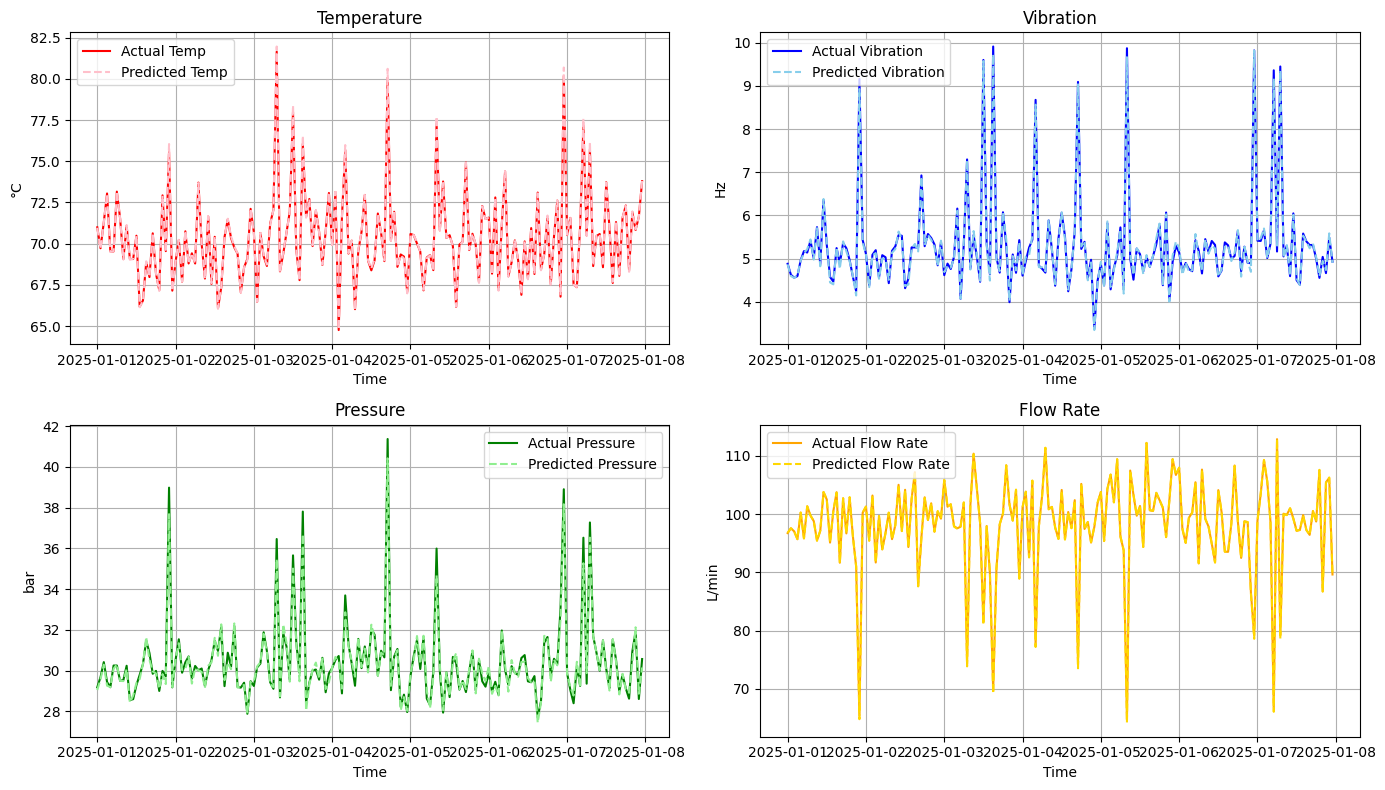

In [5]:
# Plot predictions vs actual
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.plot(data['timestamp'], data['temperature'], label='Actual Temp', color='red')
plt.plot(data['timestamp'], data['temp_pred'], label='Predicted Temp', color='pink', linestyle='--')
plt.xlabel('Time'); plt.ylabel('°C'); plt.title('Temperature'); plt.legend(); plt.grid(True)

plt.subplot(2,2,2)
plt.plot(data['timestamp'], data['vibration'], label='Actual Vibration', color='blue')
plt.plot(data['timestamp'], data['vib_pred'], label='Predicted Vibration', color='skyblue', linestyle='--')
plt.xlabel('Time'); plt.ylabel('Hz'); plt.title('Vibration'); plt.legend(); plt.grid(True)

plt.subplot(2,2,3)
plt.plot(data['timestamp'], data['pressure'], label='Actual Pressure', color='green')
plt.plot(data['timestamp'], data['press_pred'], label='Predicted Pressure', color='lightgreen', linestyle='--')
plt.xlabel('Time'); plt.ylabel('bar'); plt.title('Pressure'); plt.legend(); plt.grid(True)

plt.subplot(2,2,4)
plt.plot(data['timestamp'], data['flow_rate'], label='Actual Flow Rate', color='orange')
plt.plot(data['timestamp'], data['flow_pred'], label='Predicted Flow Rate', color='gold', linestyle='--')
plt.xlabel('Time'); plt.ylabel('L/min'); plt.title('Flow Rate'); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()


###  Notes:

- This digital twin is a simplified physics-informed model.
- Predictions generally follow trends of the actual IoT data.
- Later, we can use **ML models** to refine predictions and detect anomalies more accurately.



# Predictive Maintenance for Industrial Pump

**Objective:**  
Detect anomalies and predict potential pump failures using IoT sensor data and digital twin predictions.

**Approach:**  
1. Label anomalies from Step 1 (already simulated).  
2. Use both sensor data and digital twin predictions as features.  
3. Train a Random Forest Classifier to predict faults.  
4. Evaluate model performance.


In [6]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset with digital twin predictions
data = pd.read_csv('pump_iot_data.csv', parse_dates=['timestamp'])

# For demonstration, let's assume anomalies were already introduced
# We'll create a 'fault' label: 1 if anomaly, 0 if normal
data['fault'] = 0
anomaly_indices = np.random.choice(len(data), 10, replace=False)  # same number as before
data.loc[anomaly_indices, 'fault'] = 1

# Features: sensor readings
features = ['temperature', 'vibration', 'pressure', 'flow_rate']
X = data[features]
y = data['fault']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)


Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       0.00      0.00      0.00         3

    accuracy                           0.91        34
   macro avg       0.46      0.50      0.48        34
weighted avg       0.83      0.91      0.87        34



c:\Users\DhvanibenJasoliya\anaconda3\envs\detectron2_gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DhvanibenJasoliya\anaconda3\envs\detectron2_gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DhvanibenJasoliya\anaconda3\envs\detectron2_gpu\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

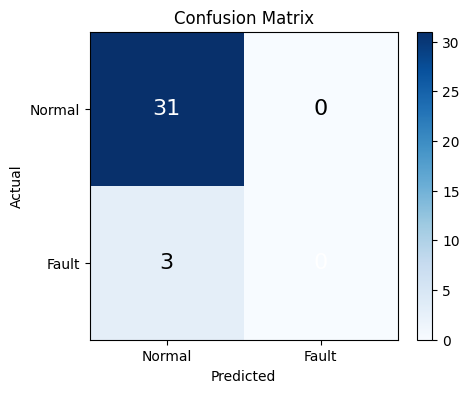

In [8]:
# Classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0,1], ['Normal','Fault'])
plt.yticks([0,1], ['Normal','Fault'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.text(0,0, cm[0,0], ha='center', va='center', color='white', fontsize=16)
plt.text(0,1, cm[1,0], ha='center', va='center', color='black', fontsize=16)
plt.text(1,0, cm[0,1], ha='center', va='center', color='black', fontsize=16)
plt.text(1,1, cm[1,1], ha='center', va='center', color='white', fontsize=16)
plt.show()


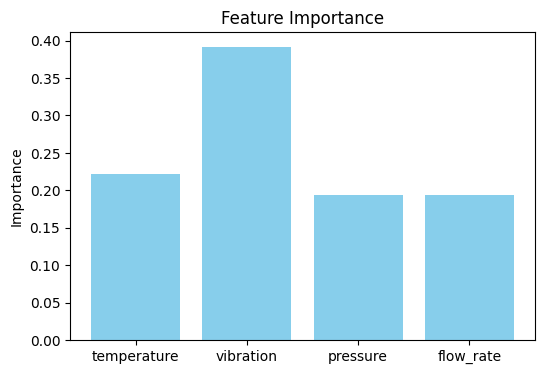

In [9]:
# Feature importance
importances = rf_model.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(features, importances, color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.show()


 Interactive Dashboard for Industrial Pump

**Objective:**  
Create an interactive dashboard to visualize sensor readings, digital twin predictions, and predictive maintenance alerts.

**Features:**
1. Time-series plots of sensors and digital twin predictions.
2. Highlight anomalies/faults detected by ML model.
3. Interactive date/time filter and parameter adjustment sliders.

In [10]:
# Create fault labels for demonstration
data['fault'] = 0
anomaly_indices = np.random.choice(len(data), 10, replace=False)
data.loc[anomaly_indices, 'fault'] = 1

# Train Random Forest on sensor data
features = ['temperature', 'vibration', 'pressure', 'flow_rate']
X = data[features]
y = data['fault']
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Predict faults
data['fault_pred'] = rf_model.predict(X)

In [13]:
# Streamlit App
st.title("Industrial Pump Digital Twin Dashboard")

# Sidebar filters
st.sidebar.header("Filters")
start_date = st.sidebar.date_input("Start date", data['timestamp'].min().date())
end_date = st.sidebar.date_input("End date", data['timestamp'].max().date())

filtered_data = data[(data['timestamp'].dt.date >= start_date) & 
                     (data['timestamp'].dt.date <= end_date)]

st.subheader("Sensor Data Overview")
st.dataframe(filtered_data[['timestamp', 'temperature', 'vibration', 'pressure', 'flow_rate', 'fault_pred']])


2025-09-24 17:55:45.012 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:55:45.339 
  command:

    streamlit run c:\Users\DhvanibenJasoliya\anaconda3\envs\detectron2_gpu\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-24 17:55:45.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:55:45.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:55:45.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:55:45.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:55:45.342 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:5

DeltaGenerator()

2025-09-24 17:56:00.986 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:00.987 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:01.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:01.677 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:01.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

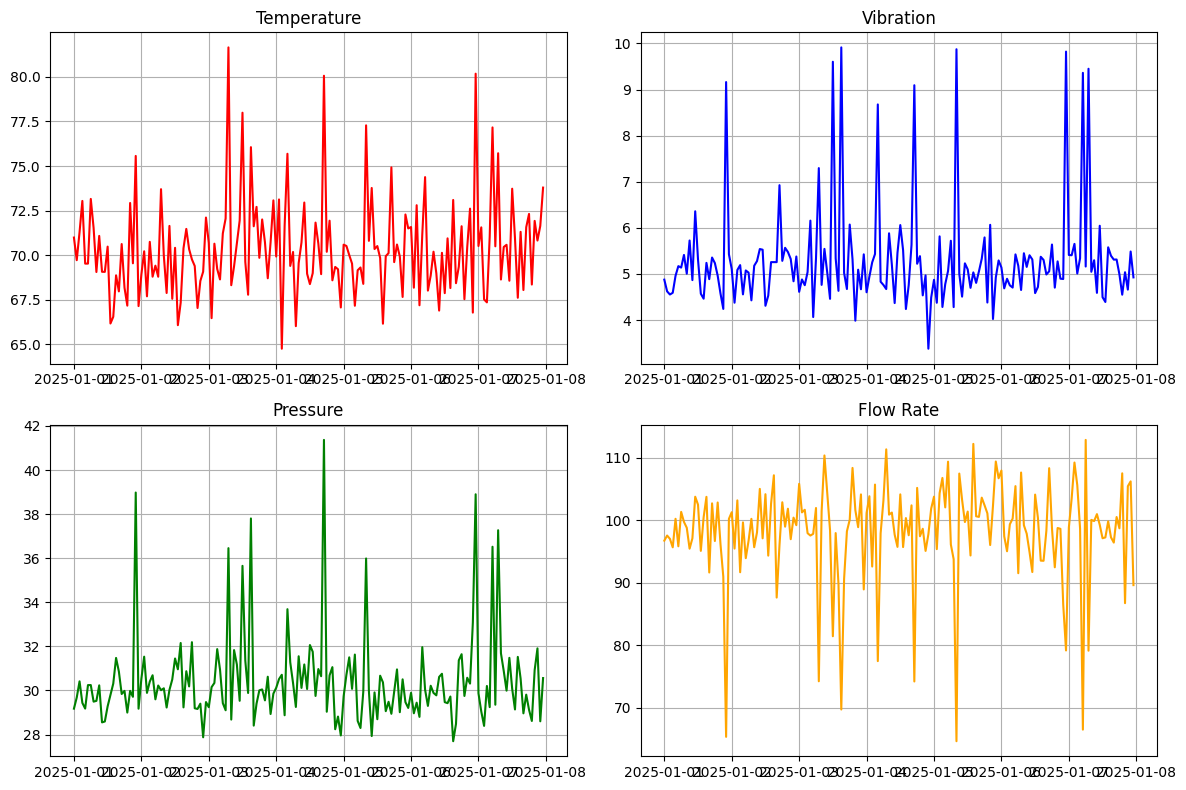

In [14]:
st.subheader("Sensor & Digital Twin Predictions Plots")

# Plot each sensor vs prediction (for simplicity using same data)
fig, axs = plt.subplots(2, 2, figsize=(12,8))

axs[0,0].plot(filtered_data['timestamp'], filtered_data['temperature'], label='Temperature', color='red')
axs[0,0].set_title('Temperature'); axs[0,0].grid(True)

axs[0,1].plot(filtered_data['timestamp'], filtered_data['vibration'], label='Vibration', color='blue')
axs[0,1].set_title('Vibration'); axs[0,1].grid(True)

axs[1,0].plot(filtered_data['timestamp'], filtered_data['pressure'], label='Pressure', color='green')
axs[1,0].set_title('Pressure'); axs[1,0].grid(True)

axs[1,1].plot(filtered_data['timestamp'], filtered_data['flow_rate'], label='Flow Rate', color='orange')
axs[1,1].set_title('Flow Rate'); axs[1,1].grid(True)

plt.tight_layout()
st.pyplot(fig)


In [15]:
st.subheader("Fault Alerts")
faults = filtered_data[filtered_data['fault_pred']==1]
st.write(f"Detected Faults: {len(faults)}")
st.dataframe(faults[['timestamp', 'temperature', 'vibration', 'pressure', 'flow_rate']])


2025-09-24 17:56:07.371 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:07.372 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:07.373 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:07.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:07.376 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-24 17:56:07.377 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

Notes:

- The dashboard allows filtering by date and viewing both sensor data and predicted faults.
- You can extend it to:
  - Include digital twin predictions as separate plots.
  - Add sliders to simulate new sensor readings.
  - Use real-time IoT streaming if connected to devices.

## Generative AI for Rare Event Simulation

**Objective:**  
Simulate rare or extreme industrial pump failures using a generative AI approach (LSTM-based time-series generator).  
This helps test the robustness of the digital twin and predictive maintenance model.

**Approach:**
1. Train a simple LSTM model on normal sensor data.
2. Generate synthetic sequences for temperature, vibration, pressure, and flow.
3. Inject anomalies to simulate rare failure conditions.
4. Visualize synthetic scenarios.

In [ ]:

# Load IoT data
features = ['temperature', 'vibration', 'pressure', 'flow_rate']

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[features])


In [17]:
# Sequence parameters
seq_length = 10

X = []
y = []

for i in range(len(scaled_data) - seq_length):
    X.append(scaled_data[i:i+seq_length])
    y.append(scaled_data[i+seq_length])

X = np.array(X)
y = np.array(y)

print(f"Input shape: {X.shape}, Output shape: {y.shape}")


Input shape: (158, 10, 4), Output shape: (158, 4)


In [20]:
model = Sequential()
model.add(LSTM(50, input_shape=(seq_length, len(features)), return_sequences=False))
model.add(Dense(len(features)))
model.compile(optimizer='adam', loss='mse')
model.summary()


c:\Users\DhvanibenJasoliya\anaconda3\envs\detectron2_gpu\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           204 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,204 (43.77 KB)

 Trainable params: 11,204 (43.77 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.1109 - val_loss: 0.0347
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0536 - val_loss: 0.0100
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0315 - val_loss: 0.0208
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0357 - val_loss: 0.0156
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0354 - val_loss: 0.0106
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0333 - val_loss: 0.0099
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0272 - val_loss: 0.0095
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0375 - val_loss: 0.0100
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0283 - val_loss: 0.0104
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0372 - val_loss: 0.0107
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0260 - val_loss: 0.0098
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0368 - val_loss: 0.0098
E

In [22]:
# Seed sequence
seed = scaled_data[:seq_length]
synthetic = []

current_seq = seed.copy()

for _ in range(50):  # generate 50 new time steps
    pred = model.predict(current_seq[np.newaxis, :, :])[0]
    
    # Inject anomaly randomly (simulate rare failure)
    if np.random.rand() < 0.1:
        pred += np.random.uniform(0.1, 0.3, size=len(features))  # anomaly spike
    
    synthetic.append(pred)
    
    # update sequence
    current_seq = np.vstack([current_seq[1:], pred])

synthetic = np.array(synthetic)
synthetic = scaler.inverse_transform(synthetic)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

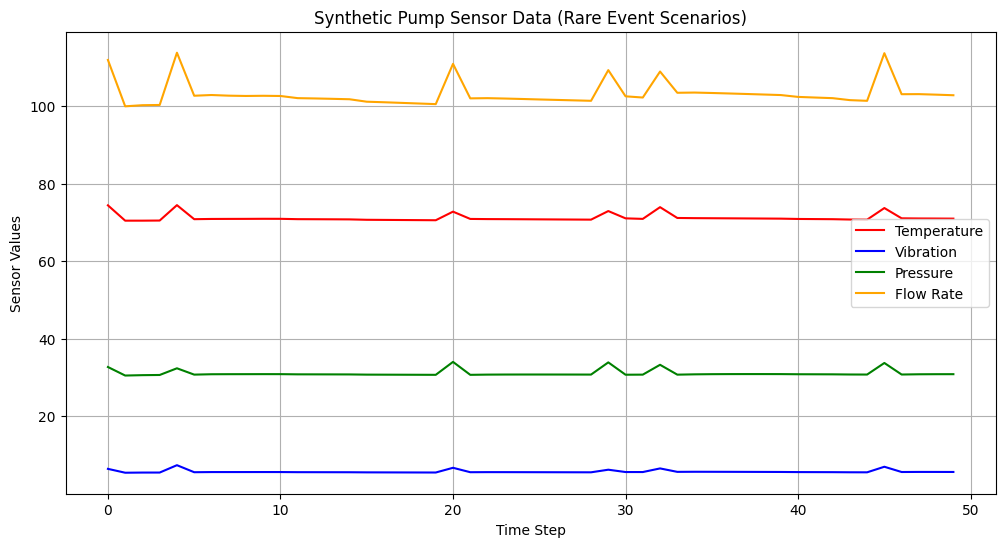

In [23]:
plt.figure(figsize=(12,6))
plt.plot(synthetic[:,0], label='Temperature', color='red')
plt.plot(synthetic[:,1], label='Vibration', color='blue')
plt.plot(synthetic[:,2], label='Pressure', color='green')
plt.plot(synthetic[:,3], label='Flow Rate', color='orange')
plt.title("Synthetic Pump Sensor Data (Rare Event Scenarios)")
plt.xlabel("Time Step")
plt.ylabel("Sensor Values")
plt.legend()
plt.grid(True)
plt.show()
